## **Master in Applied Artificial Intelligence**
### **Course: Artificial Intelligence and Automatic Learning**
### Prof. Iván Olmos
#### Tecnológico de Monterrey

### **Project: Reading, writing, Big Data Pyspark files**
##### **Name and enrollment numbers of the team members:**
* Victoria Melgarejo Cabrera - A01795030
* Héctor Alejandro Alvarez Rosas - A01796262
* Andrea Xcaret Gomez Alfaro - A01796384
* Mario Guillen de la Torre - A01796701

---
#### **Activity Description:**
Identify a Big Data database for the application of the concepts learned in the course, starting with the basic manipulation of reading and writing files with PysPark.

---

In [1]:
# Pyspark installation in Colab
!pip install pyspark

### **Import of libraries**

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, when, count, percentile_approx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### **Creation of the Spark session** 

In [3]:
spark = SparkSession.builder \
    .appName("ChicagoTaxyTripsAnalysis") \
     .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.python.worker.timeout", "600") \
    .config("spark.python.worker.retries", "3") \
    .getOrCreate()

### **Loading of datasets**

In [4]:
filename = "Taxi_Trips__2024-__20250426.csv"

# Local route where you want to save the file
local_path = filename

# CSV file load
dftaxytrips = spark.read.csv(local_path, header=True, inferSchema=True)

In [5]:
print("Number of records:", dftaxytrips.count())
print("Number of columns:", len(dftaxytrips.columns))

Number of records: 7917844
Number of columns: 23


### **Data exploration**

In [6]:
# DATASET structure
dftaxytrips.printSchema()

root
 |-- Trip ID: string (nullable = true)
 |-- Taxi ID: string (nullable = true)
 |-- Trip Start Timestamp: string (nullable = true)
 |-- Trip End Timestamp: string (nullable = true)
 |-- Trip Seconds: integer (nullable = true)
 |-- Trip Miles: double (nullable = true)
 |-- Pickup Census Tract: long (nullable = true)
 |-- Dropoff Census Tract: long (nullable = true)
 |-- Pickup Community Area: integer (nullable = true)
 |-- Dropoff Community Area: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Tips: double (nullable = true)
 |-- Tolls: double (nullable = true)
 |-- Extras: double (nullable = true)
 |-- Trip Total: double (nullable = true)
 |-- Payment Type: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Pickup Centroid Latitude: double (nullable = true)
 |-- Pickup Centroid Longitude: double (nullable = true)
 |-- Pickup Centroid Location: string (nullable = true)
 |-- Dropoff Centroid Latitude: double (nullable = true)
 |-- Dropoff Centroid 

In [7]:
# First rows
dftaxytrips.limit(5).toPandas()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0000184e7cd53cee95af32eba49c44e4d20adcd8,f538e6b729d1aaad4230e9dcd9dc2fd9a168826ddadbd6...,01/19/2024 05:00:00 PM,01/19/2024 06:00:00 PM,4051,17.12,1.703198e+10,1.703132e+10,76,32.0,...,4.0,60.00,Credit Card,Flash Cab,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
1,000072ee076c9038868e239ca54185eb43959db0,e51e2c30caec952b40b8329a68b498e18ce8a1f40fa75c...,01/28/2024 02:30:00 PM,01/28/2024 03:00:00 PM,1749,12.70,NaN,NaN,6,NaN,...,0.0,33.75,Cash,Flash Cab,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),NaN,NaN,None
2,000074019d598c2b1d6e77fbae79e40b0461a2fc,aeb280ef3be3e27e081eb6e76027615b0d40925b84d3eb...,01/05/2024 09:00:00 AM,01/05/2024 09:00:00 AM,517,3.39,NaN,NaN,6,8.0,...,1.0,14.69,Mobile,Taxicab Insurance Agency Llc,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
3,00007572c5f92e2ff067e6f838a5ad74e83665d3,7d21c2ca227db8f27dda96612bfe5520ab408fa9a462c8...,01/22/2024 08:45:00 AM,01/22/2024 09:30:00 AM,2050,15.06,NaN,NaN,76,NaN,...,5.5,56.56,Credit Card,Globe Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,None
4,00007c3e7546e2c7d15168586943a9c22c3856cf,8ef1056519939d511d24008e394f83e925d2539d668a00...,01/18/2024 07:15:00 PM,01/18/2024 07:30:00 PM,1004,1.18,1.703184e+10,1.703184e+10,32,32.0,...,0.0,19.66,Mobile,5 Star Taxi,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [8]:
dftaxytrips.summary().toPandas().T

,0,1,2,3,4,5,6,7
summary,count,mean,stddev,min,25%,50%,75%,max
Trip ID,7917844,Infinity,None,0000006aa752d456d05c6eeb43b057adb1ffa540,Infinity,Infinity,Infinity,ffffffdda8f2f9f98cf474cce05b7e5e34dc25e4
Taxi ID,7917844,None,None,000daaa11a2d961100513e232a1ce05391c5d797d2dc56...,None,None,None,ffda53354c610fd3af1aee46d723028a49014e35f7280c...
Trip Start Timestamp,7917844,None,None,01/01/2024 01:00:00 AM,None,None,None,12/31/2024 12:45:00 PM
Trip End Timestamp,7917778,None,None,01/01/2024 01:00:00 AM,None,None,None,12/31/2024 12:45:00 PM
Trip Seconds,7916303,1254.9250153764958,1648.0977197601726,0,480,943,1714,86396
Trip Miles,7917775,6.802327488467674,7.957195844290252,0.0,1.03,3.34,11.98,3397.8
Pickup Census Tract,3392900,1.7031508395342648E10,374237.3662004645,17031010100,17031081700,17031320400,17031980000,17031980100
Dropoff Census Tract,3281682,1.703141394138261E10,342509.8545557547,17031010100,17031081500,17031320100,17031839100,17031980100
Pickup Community Area,7691067,36.09328575605959,26.291497670579886,1,8,32,63,77


In [9]:
# General statistics
dftaxytrips.describe().toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
Trip ID,7917844,Infinity,None,0000006aa752d456d05c6eeb43b057adb1ffa540,ffffffdda8f2f9f98cf474cce05b7e5e34dc25e4
Taxi ID,7917844,None,None,000daaa11a2d961100513e232a1ce05391c5d797d2dc56...,ffda53354c610fd3af1aee46d723028a49014e35f7280c...
Trip Start Timestamp,7917844,None,None,01/01/2024 01:00:00 AM,12/31/2024 12:45:00 PM
Trip End Timestamp,7917778,None,None,01/01/2024 01:00:00 AM,12/31/2024 12:45:00 PM
Trip Seconds,7916303,1254.9250153764958,1648.0977197601726,0,86396
Trip Miles,7917775,6.802327488467674,7.957195844290252,0.0,3397.8
Pickup Census Tract,3392900,1.7031508395342648E10,374237.3662004645,17031010100,17031980100
Dropoff Census Tract,3281682,1.703141394138261E10,342509.8545557547,17031010100,17031980100
Pickup Community Area,7691067,36.09328575605959,26.291497670579886,1,77


In [10]:
# Analysis of missing values in 'dftaxytrips'
missing_taxytrips = dftaxytrips.select([
    count(when(col(c).isNull() | isnan(c), c)).alias(c) # count (when (col (c) .isnull (), c)). aka (c)
    for c in dftaxytrips.columns
])

print("Missing values in Chicago Taxi Trips Dataset (CSV):")
missing_taxytrips.toPandas()


Missing values in Chicago Taxi Trips Dataset (CSV):


,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0,0,0,66,1541,69,4524944,4636162,226777,742953,...,20575,20575,0,0,222468,222468,222468,697653,697653,697653


In [11]:
# Function to eliminate atypical values of a dataframe and modify it
def remove_outliers_inplace(df, column):
    # Calculate the Q1 and Q3 percentiles for the column
    percentiles = df.approxQuantile(column, [0.25, 0.75], 0.05)  # 5% calculation error
    Q1 = percentiles[0]
    Q3 = percentiles[1]

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the lower and upper limits for atypical values
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filter the dataframe to eliminate atypical values and modify the original data
    df = df.filter((col(column) >= lower_limit) & (col(column) <= upper_limit))

    return df

In [12]:
# List of numerical columns
columns_to_plot = ["Trip Seconds", "Trip Miles", "Fare", "Tips", "Tolls", "Extras", "Trip Total"]

# Eliminate atypical values in each column and update the original dataframe
for column in columns_to_plot:
    dftaxytrips = remove_outliers_inplace(dftaxytrips, column)

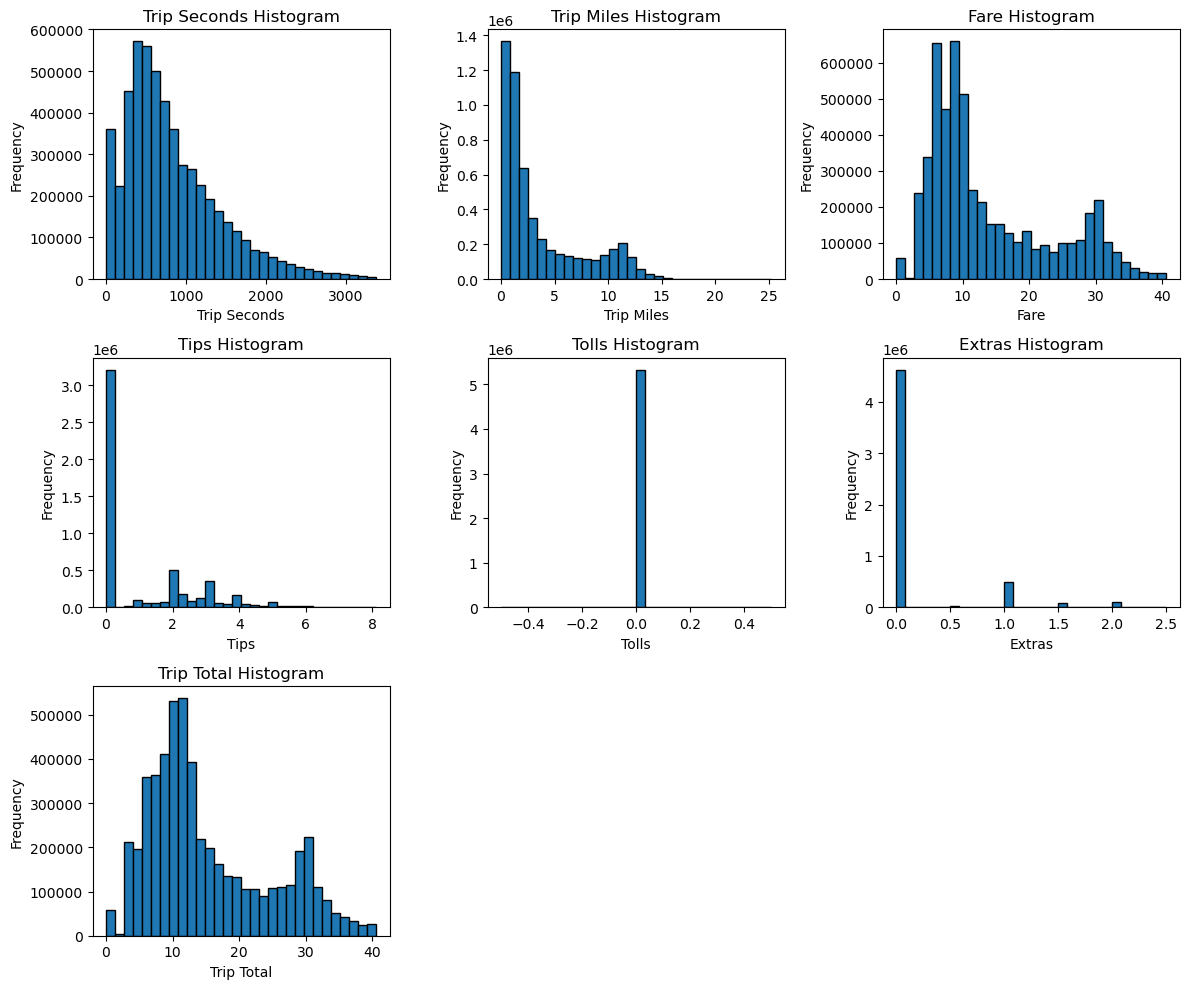

In [13]:
# Graph histograms directly
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns_to_plot, 1):
    # Obtain column data after eliminating atypical values
    data = dftaxytrips.select(column).dropna().toPandas()

    # Graph the histogram
    plt.subplot(3, 3, i)
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(f"{column} Histogram")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

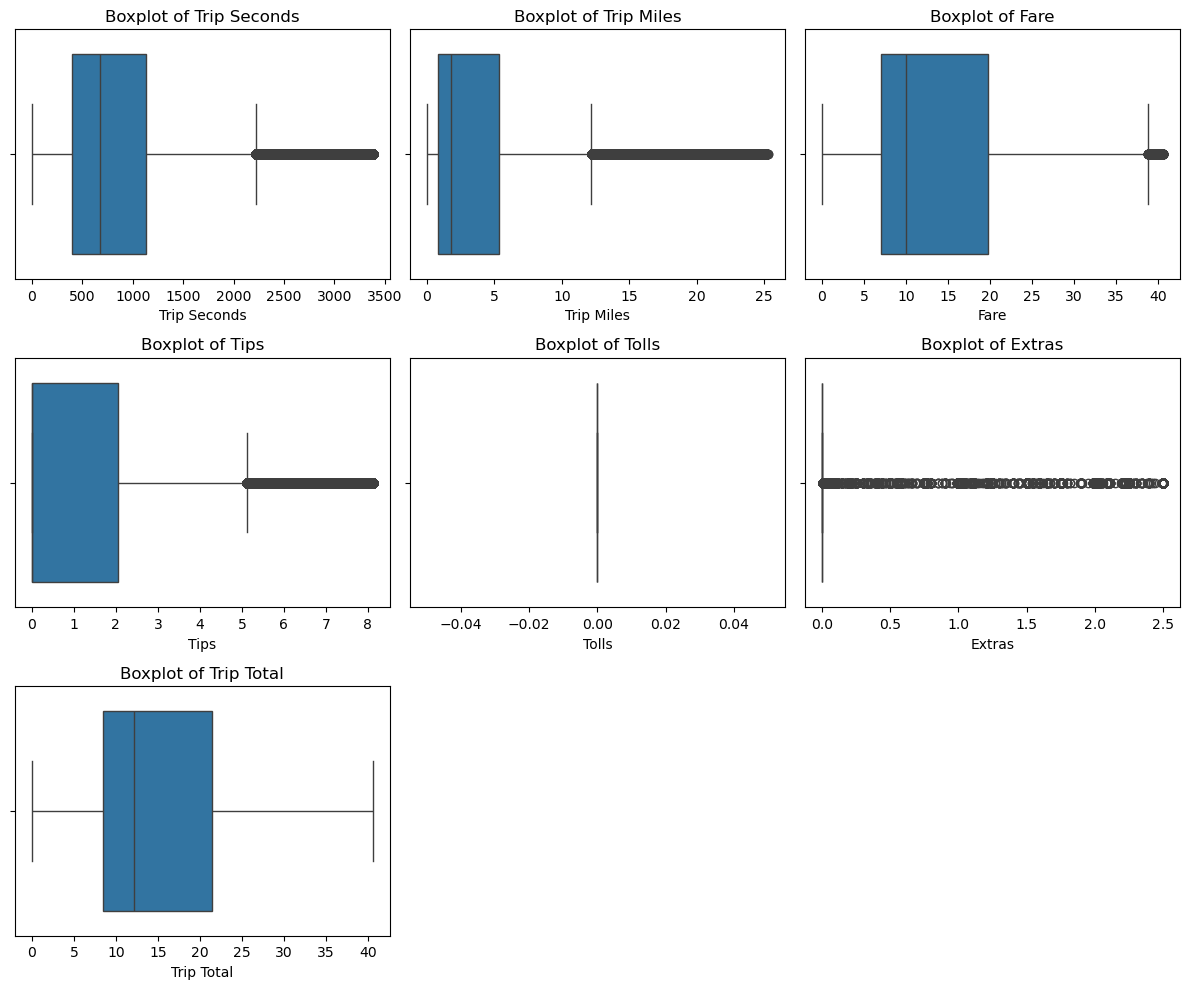

In [14]:
# Graph the boxplots directly
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns_to_plot, 1):
    # Obtain column data
    data = dftaxytrips.select(column).dropna().toPandas()

    # Graph the boxploot
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [15]:
# List of non -numerical columns
non_numeric_columns = ["Trip Start Timestamp", "Trip End Timestamp", "Payment Type", "Company",
                       "Pickup Centroid Location", "Dropoff Centroid  Location"]

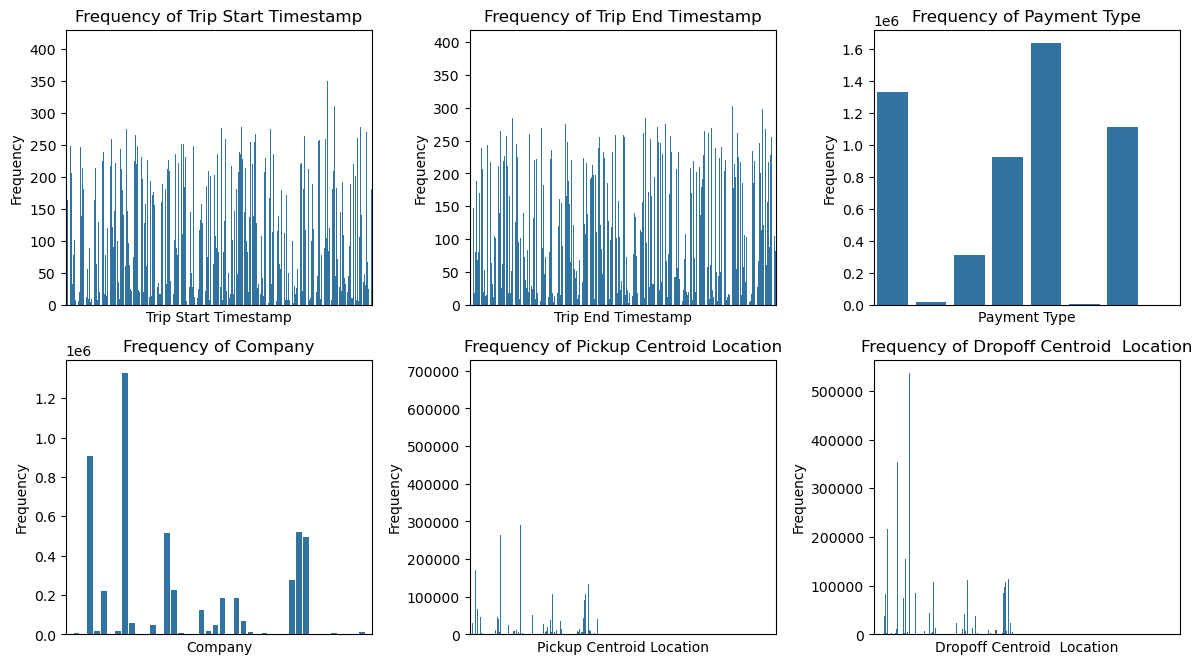

In [18]:
# Visualization of non -numerical columns values
plt.figure(figsize=(12, 10))

for i, column in enumerate(non_numeric_columns, 1):
    plt.subplot(3, 3, i)
    # Count the frequencies of each category
    df_filtered = dftaxytrips.select(column).dropna()  # Eliminate null values
    value_counts = df_filtered.groupBy(column).count().toPandas()

    # Bars chart for each column
    sns.barplot(x=column, y="count", data=value_counts)
    plt.title(f"Frequency of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks([])
plt.tight_layout()
plt.show()

In [17]:
# Check the amount of null values in non -numerical columns
print("\n Quantity of null values in non-numerical columns:")
for column in non_numeric_columns:
    null_count = dftaxytrips.filter(col(column).isNull()).count()
    print(f"{column}: {null_count} null values")


 Quantity of null values in non-numerical columns:
Trip Start Timestamp: 0 null values
Trip End Timestamp: 0 null values
Payment Type: 0 null values
Company: 0 null values
Pickup Centroid Location: 123623 null values
Dropoff Centroid  Location: 203356 null values
